<h1 style="display:flex; justify-content:center">
Projet PRBI24
</h1>

<h3 style="display:flex; justify-content:center; color:#bf1515">
Classification de chiffres manuscrits en exploitant l'algorithme des K-Moyennes
</h3>

In [174]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn

<h2>
I - Apprentissage
</h2>

In [175]:
# Path to file
file_path = './optdigits.tra'

# Charger le fichier
with open(file_path, 'r') as f:
    lines = f.readlines()

In [176]:
# Vérifions la structure d'une ligne de données
data_lines = lines[:5]  # Lire 5 lignes pour exemple
data_lines

['0,1,6,15,12,1,0,0,0,7,16,6,6,10,0,0,0,8,16,2,0,11,2,0,0,5,16,3,0,5,7,0,0,7,13,3,0,8,7,0,0,4,12,0,1,13,5,0,0,0,14,9,15,9,0,0,0,0,6,14,7,1,0,0,0\n',
 '0,0,10,16,6,0,0,0,0,7,16,8,16,5,0,0,0,11,16,0,6,14,3,0,0,12,12,0,0,11,11,0,0,12,12,0,0,8,12,0,0,7,15,1,0,13,11,0,0,0,16,8,10,15,3,0,0,0,10,16,15,3,0,0,0\n',
 '0,0,8,15,16,13,0,0,0,1,11,9,11,16,1,0,0,0,0,0,7,14,0,0,0,0,3,4,14,12,2,0,0,1,16,16,16,16,10,0,0,2,12,16,10,0,0,0,0,0,2,16,4,0,0,0,0,0,9,14,0,0,0,0,7\n',
 '0,0,0,3,11,16,0,0,0,0,5,16,11,13,7,0,0,3,15,8,1,15,6,0,0,11,16,16,16,16,10,0,0,1,4,4,13,10,2,0,0,0,0,0,15,4,0,0,0,0,0,3,16,0,0,0,0,0,0,1,15,2,0,0,4\n',
 '0,0,5,14,4,0,0,0,0,0,13,8,0,0,0,0,0,3,14,4,0,0,0,0,0,6,16,14,9,2,0,0,0,4,16,3,4,11,2,0,0,0,14,3,0,4,11,0,0,0,10,8,4,11,12,0,0,0,4,12,14,7,0,0,6\n']

In [177]:
all_numbers = []  # va contenir toutes les lignes sous forme de liste de nombres

with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()  # enlève le \n à la fin
        numbers = [int(n) for n in line.split(',') if n.strip() != '']  # transforme en int
        all_numbers.append(numbers)

# Exemple : afficher la première ligne
print(f"Nombre de lignes : {len(all_numbers)}")
print(f"Taille de colonnes : {len(all_numbers[0])}")
print(f"Contenu : {all_numbers[0]}")


Nombre de lignes : 3823
Taille de colonnes : 65
Contenu : [0, 1, 6, 15, 12, 1, 0, 0, 0, 7, 16, 6, 6, 10, 0, 0, 0, 8, 16, 2, 0, 11, 2, 0, 0, 5, 16, 3, 0, 5, 7, 0, 0, 7, 13, 3, 0, 8, 7, 0, 0, 4, 12, 0, 1, 13, 5, 0, 0, 0, 14, 9, 15, 9, 0, 0, 0, 0, 6, 14, 7, 1, 0, 0, 0]


In [178]:
with open(file_path, 'r') as f:
    lines = f.readlines()
    data = [ [int(n) for n in line.strip().split(',') if n.strip() != ''] for line in lines ]

numbers = np.array(data)
print(f"Nombre de lignes : {len(numbers)}")
print(f"Taille de colonnes : {len(numbers[0])}")
print(f"Contenu : {numbers[0]}")

Nombre de lignes : 3823
Taille de colonnes : 65
Contenu : [ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0  0]


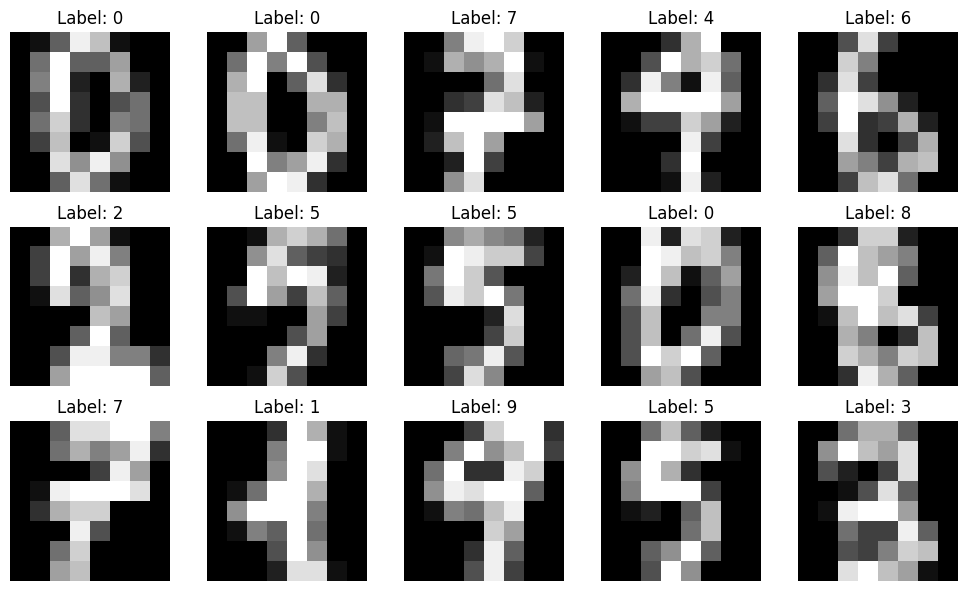

In [179]:
all_images = []
all_labels = []

for number in numbers :
    pixels = number[:-1]  # les 64 premiers
    label = number[-1]    # le dernier
    all_images.append(pixels)
    all_labels.append(label)

# Convertir en array NumPy pour manipuler facilement
images_array = np.array(all_images)  # shape (n_samples, 64)
labels_array = np.array(all_labels)  # shape (n_samples,)

# Visualisation de plusieurs images au hasard
fig, axes = plt.subplots(3, 5, figsize=(10,6))  # 15 images
for i, ax in enumerate(axes.flat):
    ax.imshow(images_array[i].reshape(8,8), cmap='gray', interpolation='nearest')
    ax.set_title(f"Label: {labels_array[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


C:\Users\zakel\AppData\Local\Temp\ipykernel_25768\190775936.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Label', y='Count', palette='viridis')


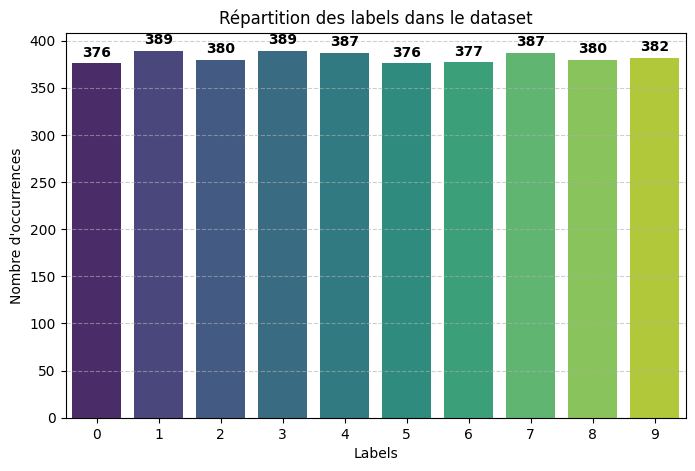

In [180]:
# Compter les occurrences de chaque label
unique_labels, counts = np.unique(all_labels, return_counts=True)

# DataFrame pour Seaborn
df = pd.DataFrame({'Label': unique_labels, 'Count': counts})

# Plot Seaborn
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df, x='Label', y='Count', palette='viridis')

plt.xlabel('Labels')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des labels dans le dataset')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajouter les valeurs au-dessus des barres
for i, count in enumerate(counts):
    ax.text(i, count + max(counts)*0.01, str(count), ha='center', va='bottom', fontweight='bold')

# Sauvegarde
plt.savefig('distribution_labels_annotated.png', dpi=300)
plt.show()

In [181]:
# Le dernier champ est le label (classe 0..9), les 64 premiers sont les pixels
X = numbers[:, :-1]  # Features (8x8 = 64)
y = numbers[:, -1]   # Labels

# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X)

# Convertir en DataFrame pour analyse
df = pd.DataFrame(X)
df['label'] = y
df['cluster'] = clusters

# Histogramme par cluster : tableau croisé
cluster_summary = pd.crosstab(df['cluster'], df['label'])

print(cluster_summary.head(10))

label      0    1    2    3    4    5    6    7    8    9
cluster                                                  
0        372    0    1    0    0    0    0    0    0    0
1          0    8    8   12    0   84    0    0   77  253
2          1  137    0    4   31    4    0    6    5   88
3          0   17  342    3    0    0    1    0    1    0
4          0    2   10    5   32    0    0  374    5   25
5          1  219   11    7    3    4    1    7  273    4
6          0    3    7  356    0    4    0    0    8   10
7          1    0    0    0  310    0    1    0    0    0
8          0    1    0    2    7  279    0    0    3    2
9          1    2    1    0    4    1  374    0    8    0
